# Import necessary modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import copy

# Load data

In [2]:
# load the data set
def load_data():
    return pd.read_csv('data/housing.csv')

In [3]:
df = load_data()

# Know your data

In [4]:
df.head() # First 5 results

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info() # # Quick description of data datatypes

# turns out there are some nullable values in total_bedrooms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


So there are a total of 20640 training set in the csv file. The total_bedrooms are available only for 20433 training set.
This means some training set has null value for total_bedroom. This needs to be taken care of. 

Moreover, we can see that all the features have the numerical data except for the ocean_proximity which is of type python object, actually a string when closely examined.

In [6]:
df.describe() # Numerical Summary

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Visualization

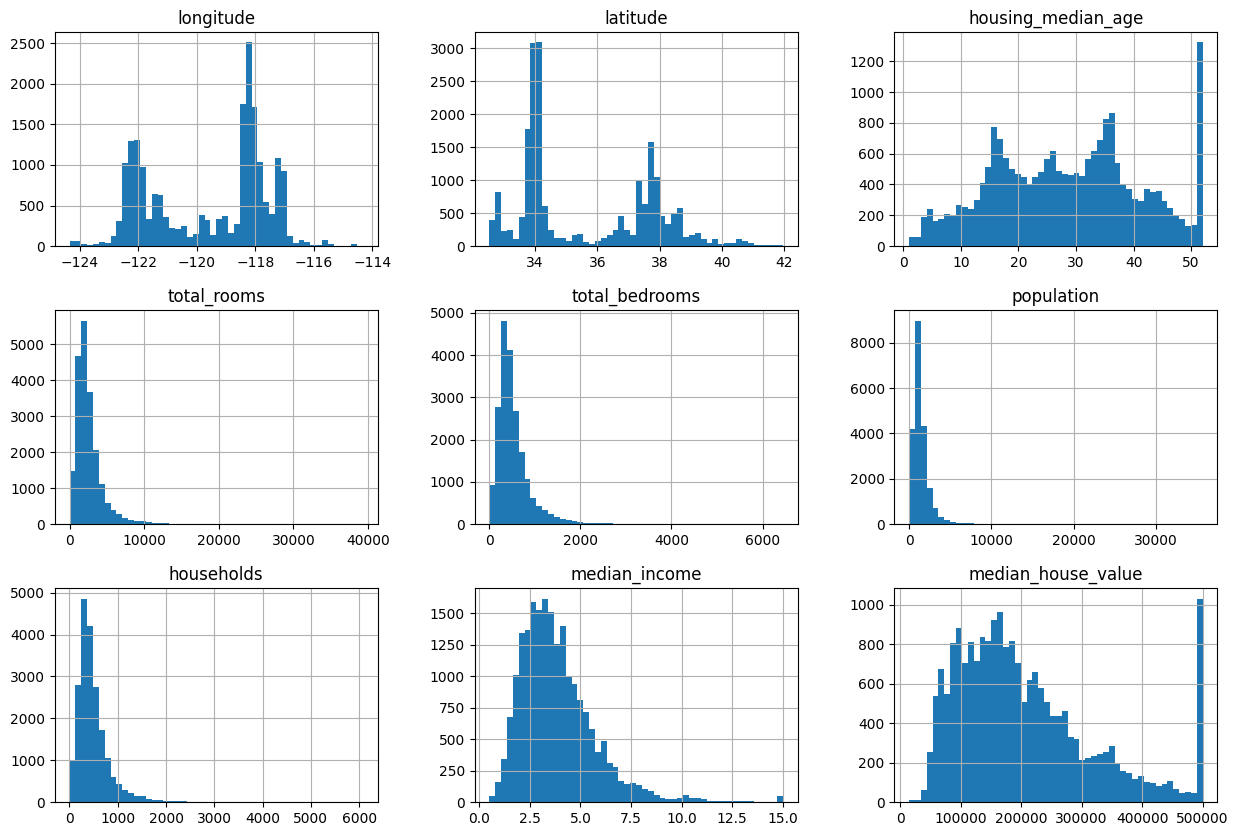

In [7]:
# Histogram plot

df.hist(bins=50, figsize=(15,10))
plt.show()

Many histograms are skewed right i.e. they extend much farther to the right of the median than to the left. 

**Skewed right**: The majority of the data points are concentrated on the left side of the distribution, and the right tail of the distribution is longer and extends further to the right. In other words, the data has a longer right tail, and the mean is typically greater than the median.

**Note:** It is also observed that some values are trimmed at particular min-max values. Such as the data of *median_house_value*

### Let's plot the histogram of logarithm 

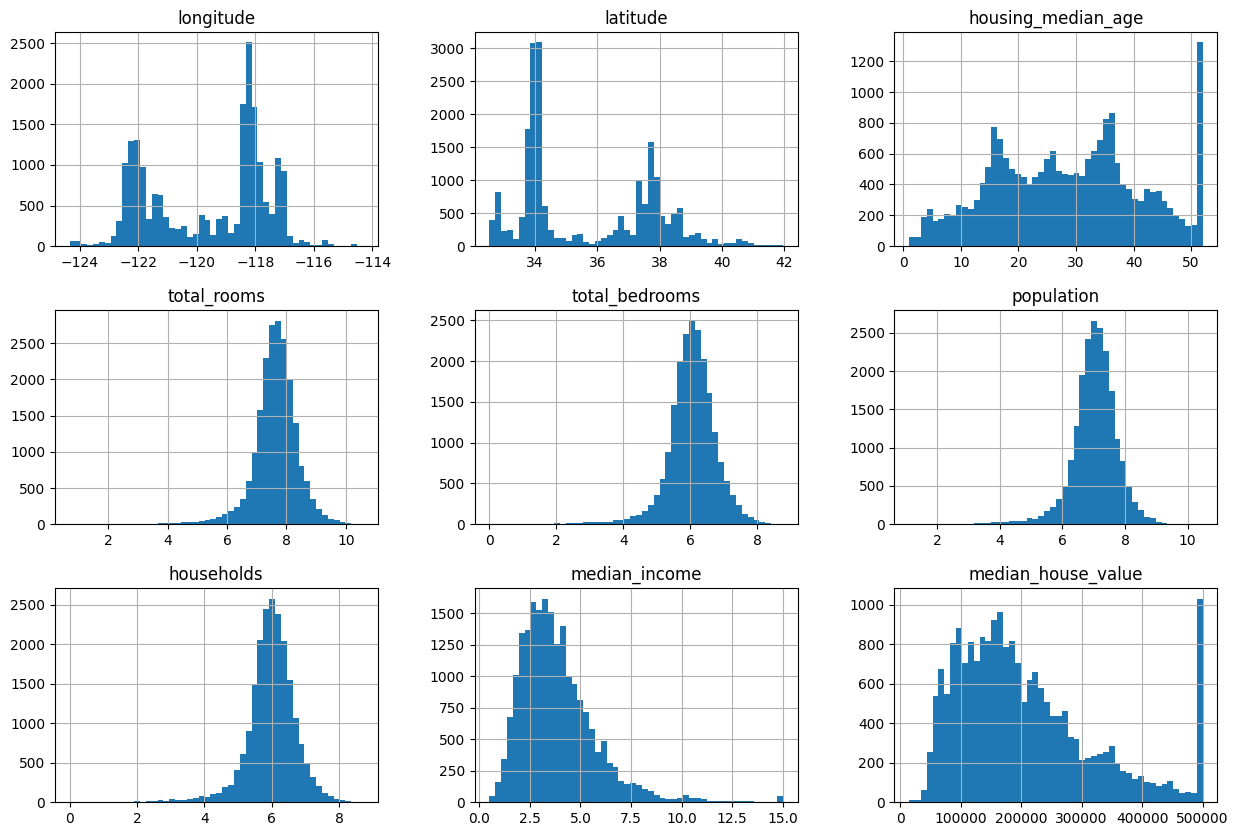

In [8]:
categories = ['total_rooms', 'total_bedrooms', 'population', 'households']

for category in categories:
    df[category] = np.log(df[category])
df.hist(bins=50, figsize=(15,10))
plt.show()

### Scatter plot the pricing at latitude and longitude

<Axes: xlabel='latitude', ylabel='longitude'>

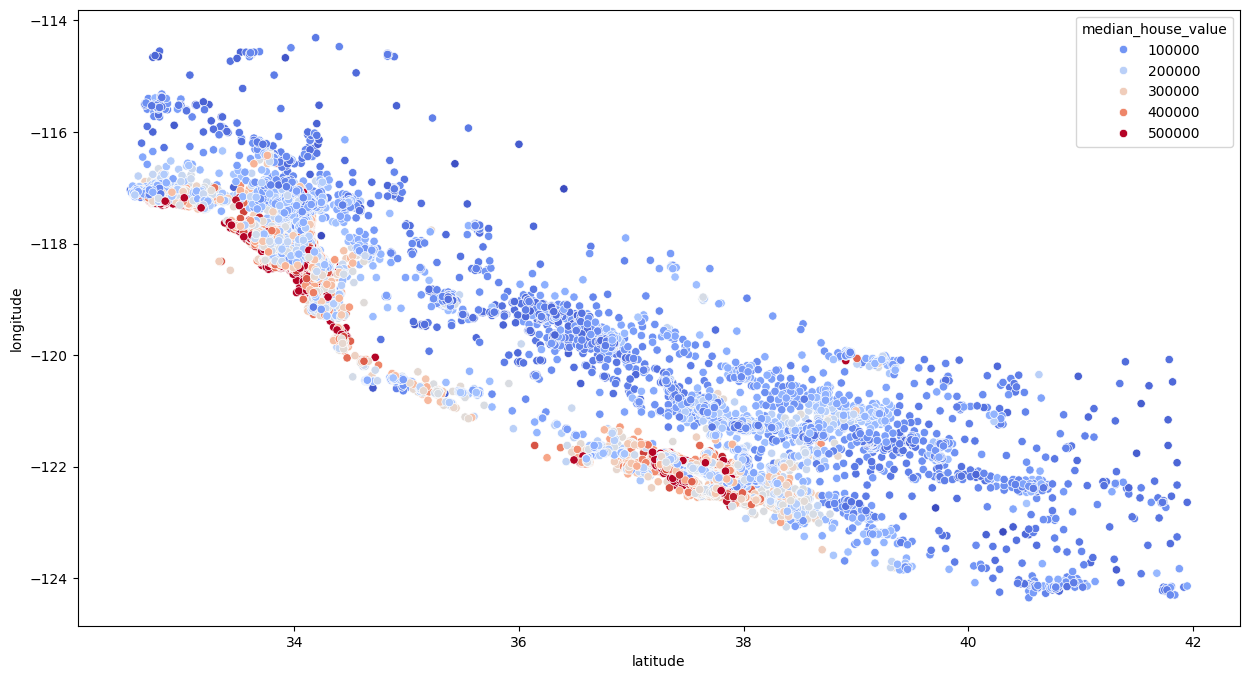

In [9]:
plt.figure(figsize=(15, 8))
sb.scatterplot(x="latitude", y="longitude", data = df, hue="median_house_value", palette="coolwarm")

### Median Income VS Median House value

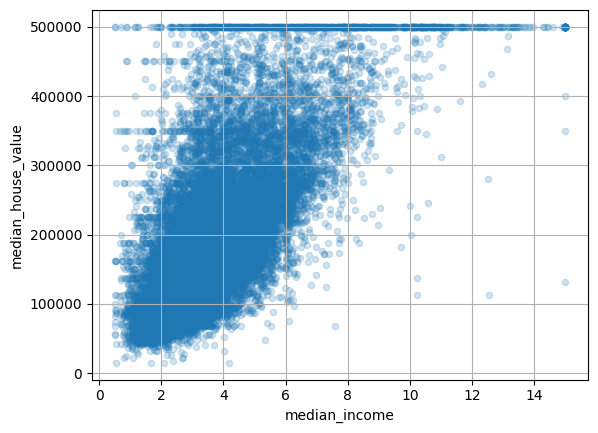

In [10]:
df.plot(kind='scatter', x='median_income', y='median_house_value', alpha=.2, grid=True)
plt.show()

# Clean the data

In [11]:
df.isna().sum() # count the no. of null values in each features

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Since the housing_median_age is null in 207 training set we need to do something with this 

**Approach 1:** We can remove the training set containing null value for bedrooms

In [12]:
df.dropna(subset= ['total_bedrooms'], inplace=True) # look in the total_bedrooms column and remove rows for null value of total_bedrooms
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


**Approach 2:** Or we can drop the entire column

In [13]:
# df.drop('total_bedrooms', axis=1, inplace=True)
# df.info()

**Approach 3:** We can set the missing values to some value (mean, median or 0)

In [14]:
# imputer = SimpleImputer(strategy='median') # using median to fill the missing values
# imputer.fit(df[['total_bedrooms']])
# df['total_bedrooms'] = imputer.transform(df[['total_bedrooms']])
# df.info()

In [15]:
df.isna().sum()
# it worked just fine and we now have 0 null values

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Handling the categorical data

As seen in the dataframe, every feature except the ocean_proximity has numerical data. But ocean_proximity has some sort of string values. 
We can't fit that to our model. So we need to convert that to numerical values.

First let's see if what data it has

In [16]:
ocean_proximity = df['ocean_proximity']
ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

So each entry in the ocean_proximity is either of 5 possible values. So it is a categorical value. 
I think, onehot encoding will be great to conver it to numerical data.  

**One-hot Encoding:**: It generates one binary attribute per category: one attribute equal to 1 when the category is "<1H OCEAN" (and 0 otherwise), another attribute equal to 1 when the category is "INLAND" (and 0 otherwise), and so on. This is called one-hot encoding because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).

In [17]:
df = df.join(pd.get_dummies(df.ocean_proximity)).drop(['ocean_proximity'], axis=1) 
# Here we are using pandas function to create new features out of the values of ocean_proximity and drop that column
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.779922,4.859812,5.774552,4.836282,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,8.867709,7.008505,7.783641,7.037028,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,7.290975,5.247024,6.206576,5.176150,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,7.149917,5.459586,6.324359,5.389072,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,7.394493,5.634790,6.336826,5.556828,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.417580,5.924256,6.739337,5.799093,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,6.546785,5.010635,5.874931,4.736198,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,7.720462,6.184149,6.914731,6.070738,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,7.528332,6.013715,6.608001,5.855072,1.8672,84700.0,False,True,False,False,False


# Look at the correlation

In [18]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.029888,0.060486,0.109012,0.055532,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.032500,-0.067948,-0.136321,-0.087902,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.313424,-0.270615,-0.242415,-0.240147,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.029888,-0.032500,-0.313424,1.000000,0.946108,0.864695,0.931841,0.205530,0.158311,0.020885,-0.012946,-0.007551,-0.016482,0.002850
total_bedrooms,0.060486,-0.067948,-0.270615,0.946108,1.000000,0.897548,0.974466,-0.025748,0.052926,0.041951,-0.045033,-0.001868,-0.016837,0.016298
population,0.109012,-0.136321,-0.242415,0.864695,0.897548,1.000000,0.932223,-0.004767,-0.021856,0.114959,-0.071830,-0.012834,-0.059256,-0.014404
households,0.055532,-0.087902,-0.240147,0.931841,0.974466,0.932223,1.000000,0.003663,0.072329,0.072486,-0.087183,-0.009148,-0.005839,0.019644
median_income,-0.015550,-0.079626,-0.118278,0.205530,-0.025748,-0.004767,0.003663,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.158311,0.052926,-0.021856,0.072329,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,0.020885,0.041951,0.114959,0.072486,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


<Axes: >

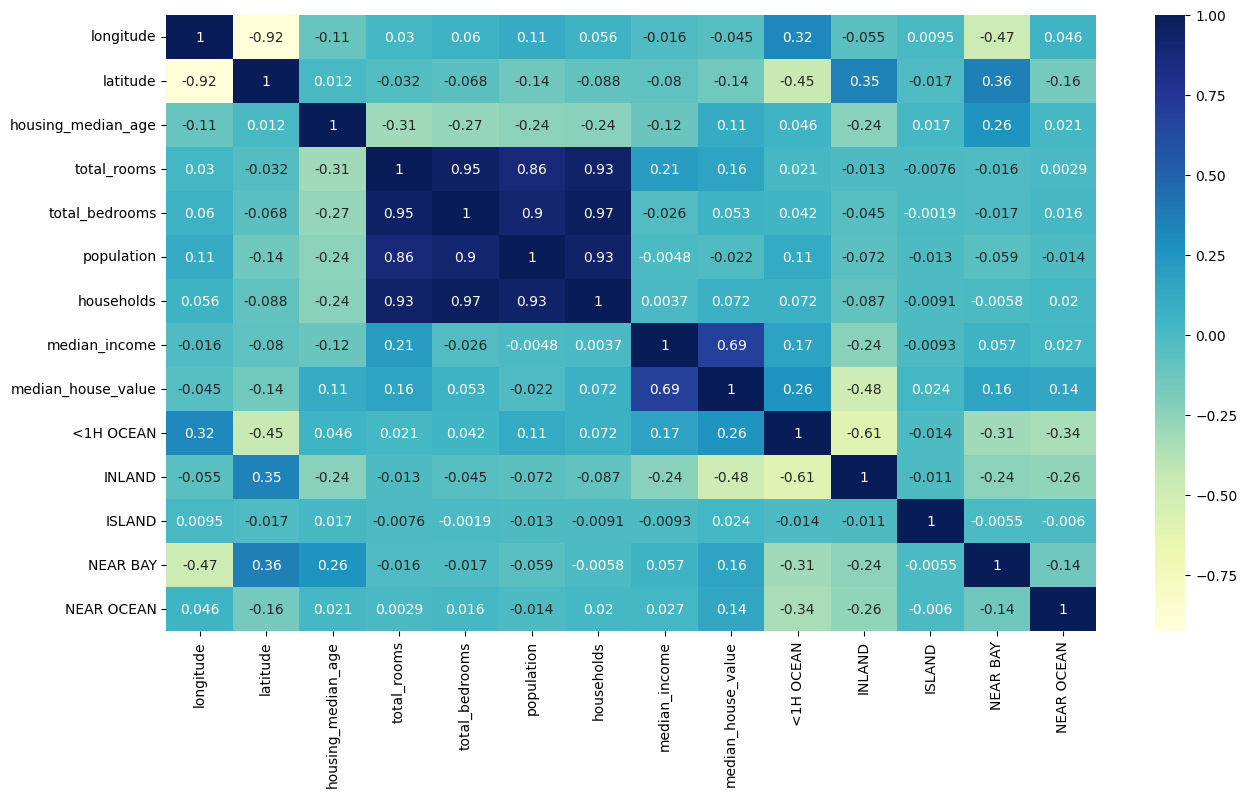

In [19]:
plt.figure(figsize=(15,8))
sb.heatmap(df.corr(), annot=True, cmap="YlGnBu")

# Feature Scaling

In [21]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))

features = ['total_rooms', 'housing_median_age', 'total_bedrooms', 'population', 'households', 'housing_median_age']


for feature in features:
    values = df[feature].values.reshape(-1, 1)
    df[feature] = min_max_scaler.fit_transform(values)


# Split the train and test data

In [20]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Model

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Test Model

In [23]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (R2) score
r2 = r2_score(y_pred, y_test)

# print the result
print(f"R-squared (R2) Score: {r2*100}%")

R-squared (R2) Score: 51.14418660632416%


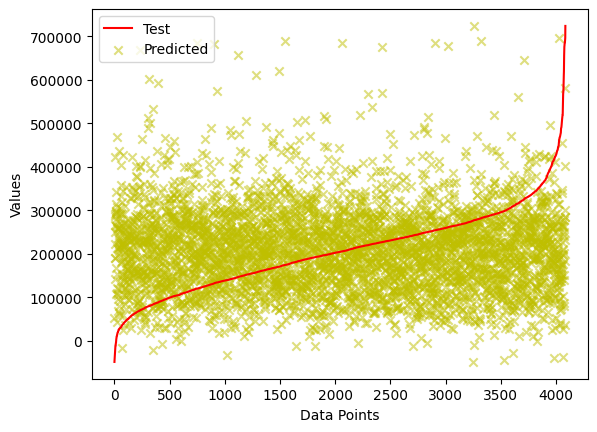

In [24]:
# Sort the predicted values and their corresponding indices
sorted_indices = sorted(range(len(y_pred)), key=lambda i: y_pred[i])
sorted_values = [y_pred[i] for i in sorted_indices]


# Create a line plot of the sorted predicted values
plt.plot(sorted_values, label='Test', c='r')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', color='y', marker='x', alpha=0.5)
# Add labels and legend
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()
